
<BR>
<CENTER>
<FONT SIZE = 4, COLOR="#2C32C3">
<BR><B>Northeastern University</B>
<BR>
ALY6010 Probability Theory & Intro Stats</B>
 <BR> US Regional Sales Data
<BR> Module 3 - Practice R  
<BR><font size=4, color=dark red> Date: 03.12.2024
</FONT>
</CENTER>


**Data Source:** US Regional Sales Data

**Data Link:** https://data.world/dataman-udit/us-regional-sales-data


In [ ]:
library(dplyr)
library(ggplot2)
library(janitor)
library(tidyr)
library(readxl)


### Reading data

In [3]:
df <- read_excel("US_Regional_Sales_Data.xlsx")
dim(df)

[1] 7991   16

In [4]:
head(df)

OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144
SO - 000106,Online,WARE-PUJ1005,2017-12-31,2018-05-31,2018-06-08,2018-06-13,USD,12,21,285,1,5,0.050,1038.5,446.555


In [5]:
# Checking if data contains NA values
colSums(is.na(df))

OrderNumber    Sales Channel    WarehouseCode     ProcuredDate 
               0                0                0                0 
       OrderDate         ShipDate     DeliveryDate     CurrencyCode 
               0                0                0                0 
    _SalesTeamID      _CustomerID         _StoreID       _ProductID 
               0                0                0                0 
  Order Quantity Discount Applied       Unit Price        Unit Cost 
               0                0                0                0

In [6]:
# Checking if data contains duplicates values
df[duplicated(df), ] 

OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [7]:
# Cleaning column names using janitor package clean_names
df <- clean_names(df)
names(df)

[1] "order_number"     "sales_channel"    "warehouse_code"   "procured_date"   
 [5] "order_date"       "ship_date"        "delivery_date"    "currency_code"   
 [9] "sales_team_id"    "customer_id"      "store_id"         "product_id"      
[13] "order_quantity"   "discount_applied" "unit_price"       "unit_cost"

In [8]:
# checking structure of dataframne
str(df)
unique(df$sales_channel)

tibble [7,991 x 16] (S3: tbl_df/tbl/data.frame)
 $ order_number    : chr [1:7991] "SO - 000101" "SO - 000102" "SO - 000103" "SO - 000104" ...
 $ sales_channel   : chr [1:7991] "In-Store" "Online" "Distributor" "Wholesale" ...
 $ warehouse_code  : chr [1:7991] "WARE-UHY1004" "WARE-NMK1003" "WARE-UHY1004" "WARE-NMK1003" ...
 $ procured_date   : POSIXct[1:7991], format: "2017-12-31" "2017-12-31" ...
 $ order_date      : POSIXct[1:7991], format: "2018-05-31" "2018-05-31" ...
 $ ship_date       : POSIXct[1:7991], format: "2018-06-14" "2018-06-22" ...
 $ delivery_date   : POSIXct[1:7991], format: "2018-06-19" "2018-07-02" ...
 $ currency_code   : chr [1:7991] "USD" "USD" "USD" "USD" ...
 $ sales_team_id   : num [1:7991] 6 14 21 28 22 12 10 6 4 10 ...
 $ customer_id     : num [1:7991] 15 20 16 48 49 21 14 9 9 33 ...
 $ store_id        : num [1:7991] 259 196 213 107 111 285 6 280 299 261 ...
 $ product_id      : num [1:7991] 12 27 16 23 26 1 5 46 47 13 ...
 $ order_quantity  : num [1:7991] 5 3

[1] "In-Store"    "Online"      "Distributor" "Wholesale"

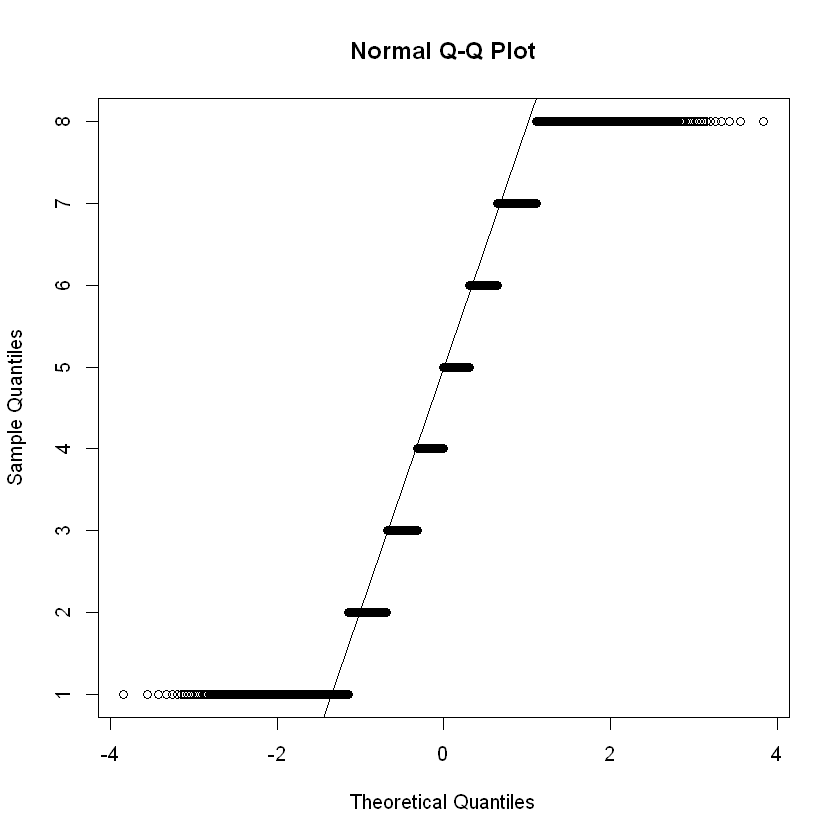

In [9]:
# checking if order_quantity follows normal distribution
qqnorm(df$order_quantity)
qqline(df$order_quantity)

In [10]:
# taking subset of dataframe to perform hypothesis testing
df_store_online <- df %>% filter(sales_channel %in% c("In-Store", "Online"))
df_dist_whole <- df %>% filter(sales_channel %in% c("Distributor", "Wholesale"))

### Two sample t-test:

The two-sample t-test (also known as the independent samples t-test) is a method used to test whether the unknown population means of two groups are equal or not

### One sample t-test:

The one sample t-test is a statistical procedure used to determine whether a sample of observations could have been generated by a process with a specific mean.

### Hypothesis Testing

#### One sample t-test

*Significance level= 0.05*

#### 1. Whether the population mean of discount applied is statistically significant?

**Null Hypothesis (H0)**: The population mean of the discount applied is equal to a 0.05
H0: μ = μ0

**Alternative Hypothesis (H1)**: The population mean of the discount applied is not equal to the 0.05
H1: μ ≠ μ0

In [31]:
discount <- 0.05

t_test1 <- t.test(df$discount_applied, mu = discount)

print(t_test1)


	One Sample t-test

data:  df$discount_applied
t = 67.271, df = 7990, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0.05
95 percent confidence interval:
 0.1125179 0.1162708
sample estimates:
mean of x 
0.1143943 



The p-value is extremely low, indicating strong evidence against the null hypothesis.
Therefore, we reject the null hypothesis and conclude that the true mean of the discount applied is not equal to 0.05.
Based on the sample data, the mean discount applied is significantly different from 0.05.


#### 2. Whether the mean of true cost is statistically significant?

**Null Hypothesis (H0)**: The true mean of the unit cost is equal to 1500.

**Alternative Hypothesis (H1)**: The true mean of the unit cost is not equal to 1500.

In [33]:
t_test2 <- t.test(df$unit_cost, mu = 1500)

print(t_test2)


	One Sample t-test

data:  df$unit_cost
t = -5.4716, df = 7990, p-value = 4.596e-08
alternative hypothesis: true mean is not equal to 1500
95 percent confidence interval:
 1407.517 1456.305
sample estimates:
mean of x 
 1431.911 



Based on the p-value being less than the significance level, we reject the null hypothesis and conclude that there is sufficient evidence to suggest that the true mean unit cost is significantly different from 1500.


#### 3. Whether the mean of order quantity is statistically significant?

**Null Hypothesis (H0)**: The true mean of the order quantity is equal to 3.

**Alternative Hypothesis (H1)**: The true mean of the order quantity is not equal to 3.

In [36]:
t_test3 <- t.test(df$order_quantity, mu = 3)

print(t_test3)


	One Sample t-test

data:  df$order_quantity
t = 58.96, df = 7990, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 3
95 percent confidence interval:
 4.474628 4.576054
sample estimates:
mean of x 
 4.525341 



The 95% confidence interval for the true mean order quantity is estimated to be between 4.47 and 4.58. The sample mean order quantity was calculated to be approximately 4.53, suggesting that, on average, the quantity of orders differs significantly from 3.
 With a p-value much smaller than the conventional significance level of 0.05, there is strong evidence to reject the null hypothesis

### Welch Two Sample t-test

#### 1. Whether the order quantity is statistically significant across sales channels In-store ans On-line?


**Null Hypothesis**: The mean order quantity is the same across all sales channels.

**Alternate Hypothesis**: The mean order quantity varies significantly between at least two sales channels. 
In other words, there is a significant difference in the average order quantity between two of the sales channels.


In [30]:
result1 <- t.test(order_quantity ~ sales_channel, data = df_store_online)
print(result1)


	Welch Two Sample t-test

data:  order_quantity by sales_channel
t = 0.28474, df = 5157.4, p-value = 0.7759
alternative hypothesis: true difference in means between group In-Store and group Online is not equal to 0
95 percent confidence interval:
 -0.1036386  0.1388600
sample estimates:
mean in group In-Store   mean in group Online 
              4.511219               4.493608 



Overall, based on the p-value and confidence interval, there's no strong evidence to reject the null hypothesis, suggesting that there is no significant difference in the mean order quantity between the "In-Store" and "Online" sales channels.


#### 2. Whether mean in group Distributor  and  mean in group Wholesale statistically significant?

**Null Hypothesis**: The mean order quantity is the same across both sales channels.

**Alternate Hypothesis**: The mean order quantity varies significantly between two sales channels. 
In other words, there is a significant difference in the average order quantity between two of the sales channels.


In [37]:
result2 <- t.test(order_quantity ~ sales_channel, data = df_dist_whole)
print(result2)



	Welch Two Sample t-test

data:  order_quantity by sales_channel
t = -0.18838, df = 1903.9, p-value = 0.8506
alternative hypothesis: true difference in means between group Distributor and group Wholesale is not equal to 0
95 percent confidence interval:
 -0.2156895  0.1778859
sample estimates:
mean in group Distributor   mean in group Wholesale 
                 4.572364                  4.591265 



Since the p-value (0.8506) is greater than the significance level, we fail to reject the null hypothesis. This suggests that there is not enough evidence to conclude that the mean order quantity differs significantly between the Distributor and Wholesale sales channels. Additionally, the confidence interval includes 0, further supporting the lack of a significant difference in means between the two groups.








References:
1. https://towardsdatascience.com/hypothesis-testing-in-real-life-47f42420b1f7
2. https://www.jmp.com/en_us/statistics-knowledge-portal/t-test/one-sample-t-test.html